In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
df = pd.read_csv('test_QoiMO9B.csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB
None


In [6]:
print(df.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64


In [7]:
print(df.describe())

                 id          week     center_id       meal_id  checkout_price  \
count  3.257300e+04  32573.000000  32573.000000  32573.000000    32573.000000   
mean   1.248476e+06    150.477819     81.901728   2032.067909      341.854440   
std    1.441580e+05      2.864072     45.950455    547.199004      153.893886   
min    1.000085e+06    146.000000     10.000000   1062.000000       67.900000   
25%    1.123969e+06    148.000000     43.000000   1558.000000      214.430000   
50%    1.247296e+06    150.000000     76.000000   1993.000000      320.130000   
75%    1.372971e+06    153.000000    110.000000   2569.000000      446.230000   
max    1.499996e+06    155.000000    186.000000   2956.000000     1113.620000   

         base_price  emailer_for_promotion  homepage_featured  
count  32573.000000           32573.000000       32573.000000  
mean     356.493615               0.066435           0.081356  
std      155.150101               0.249045           0.273385  
min       89.2

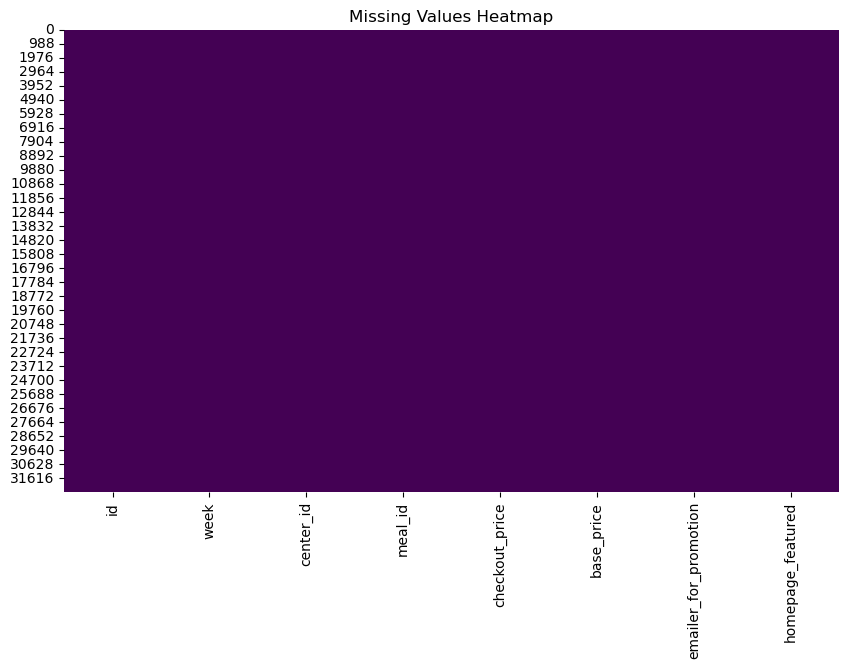

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

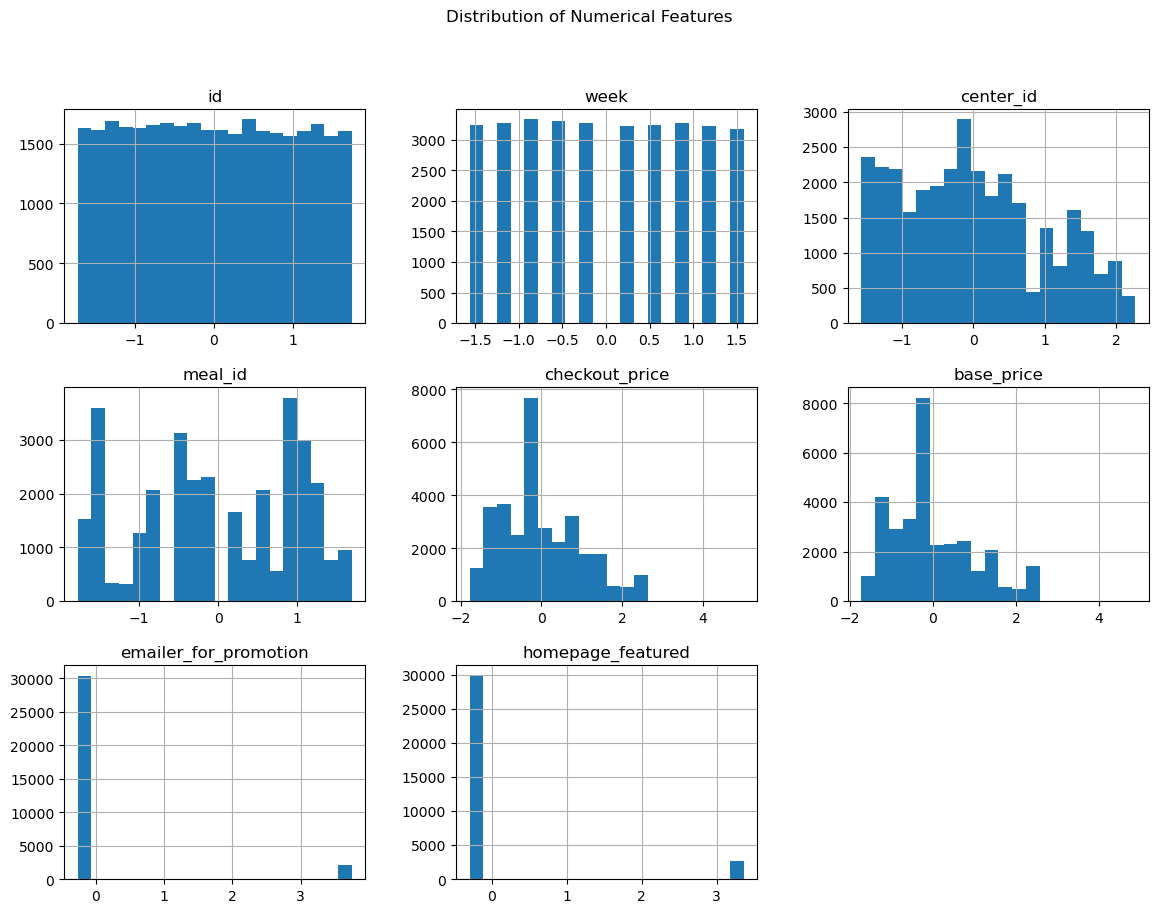

In [15]:
df[numerical_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

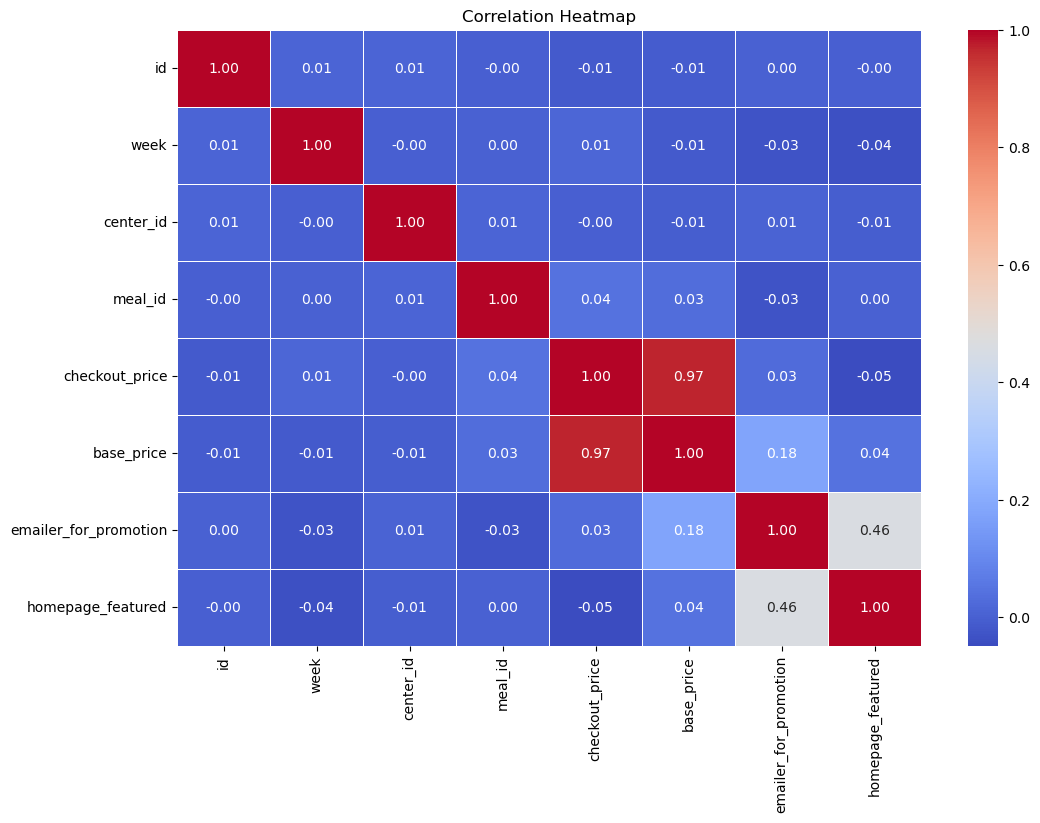

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


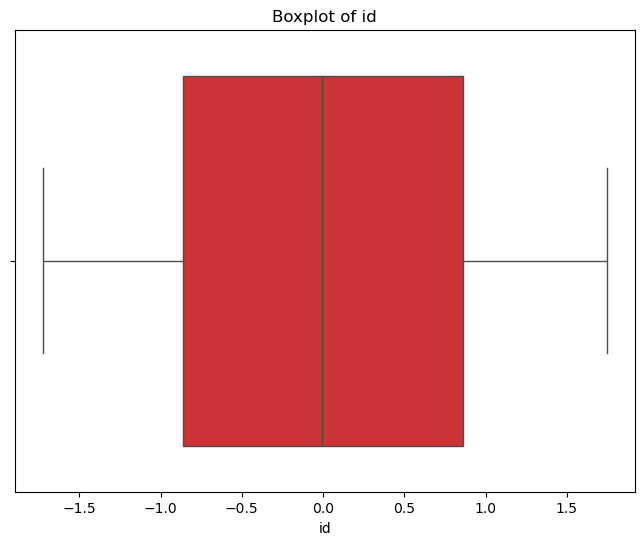

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


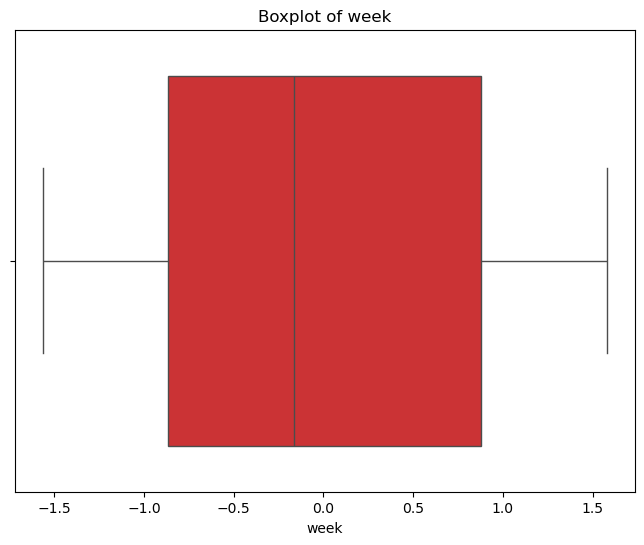

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


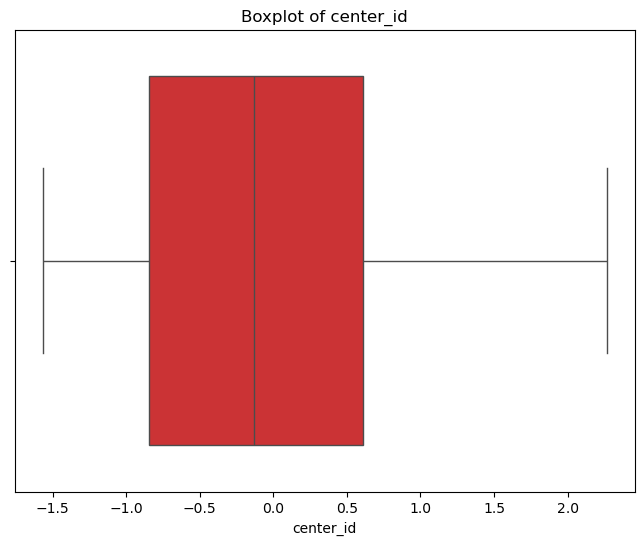

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


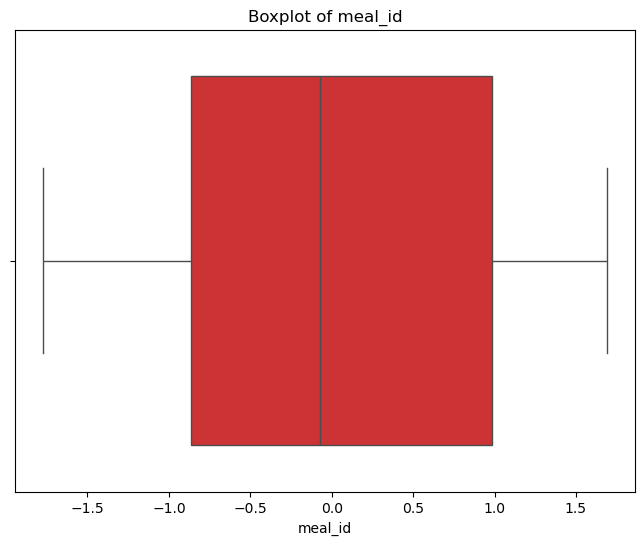

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


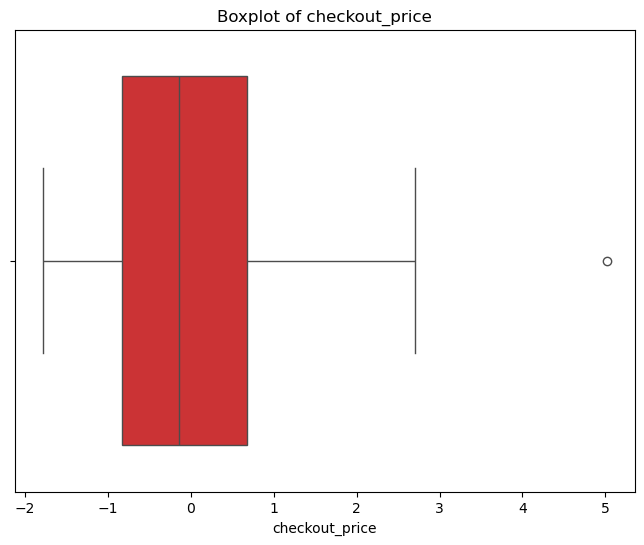

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


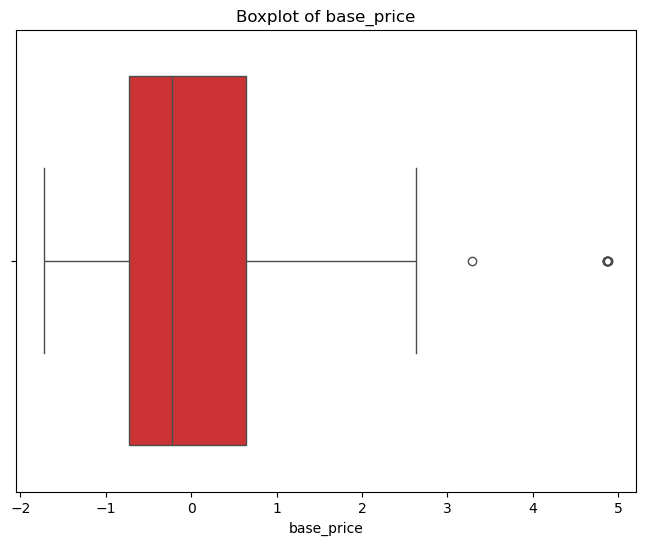

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


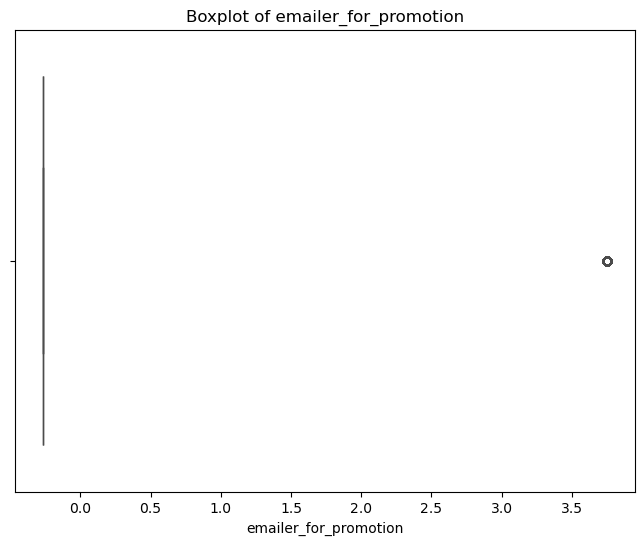

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\1656321397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set1')


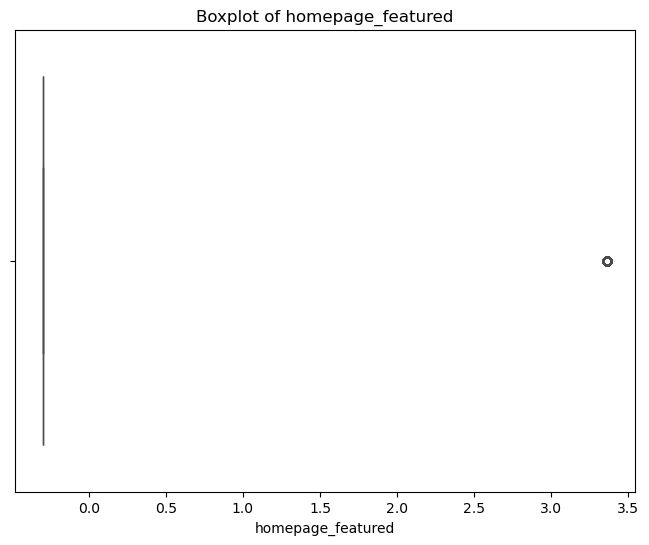

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], palette='Set1')
    plt.title(f"Boxplot of {col}")
    plt.show()

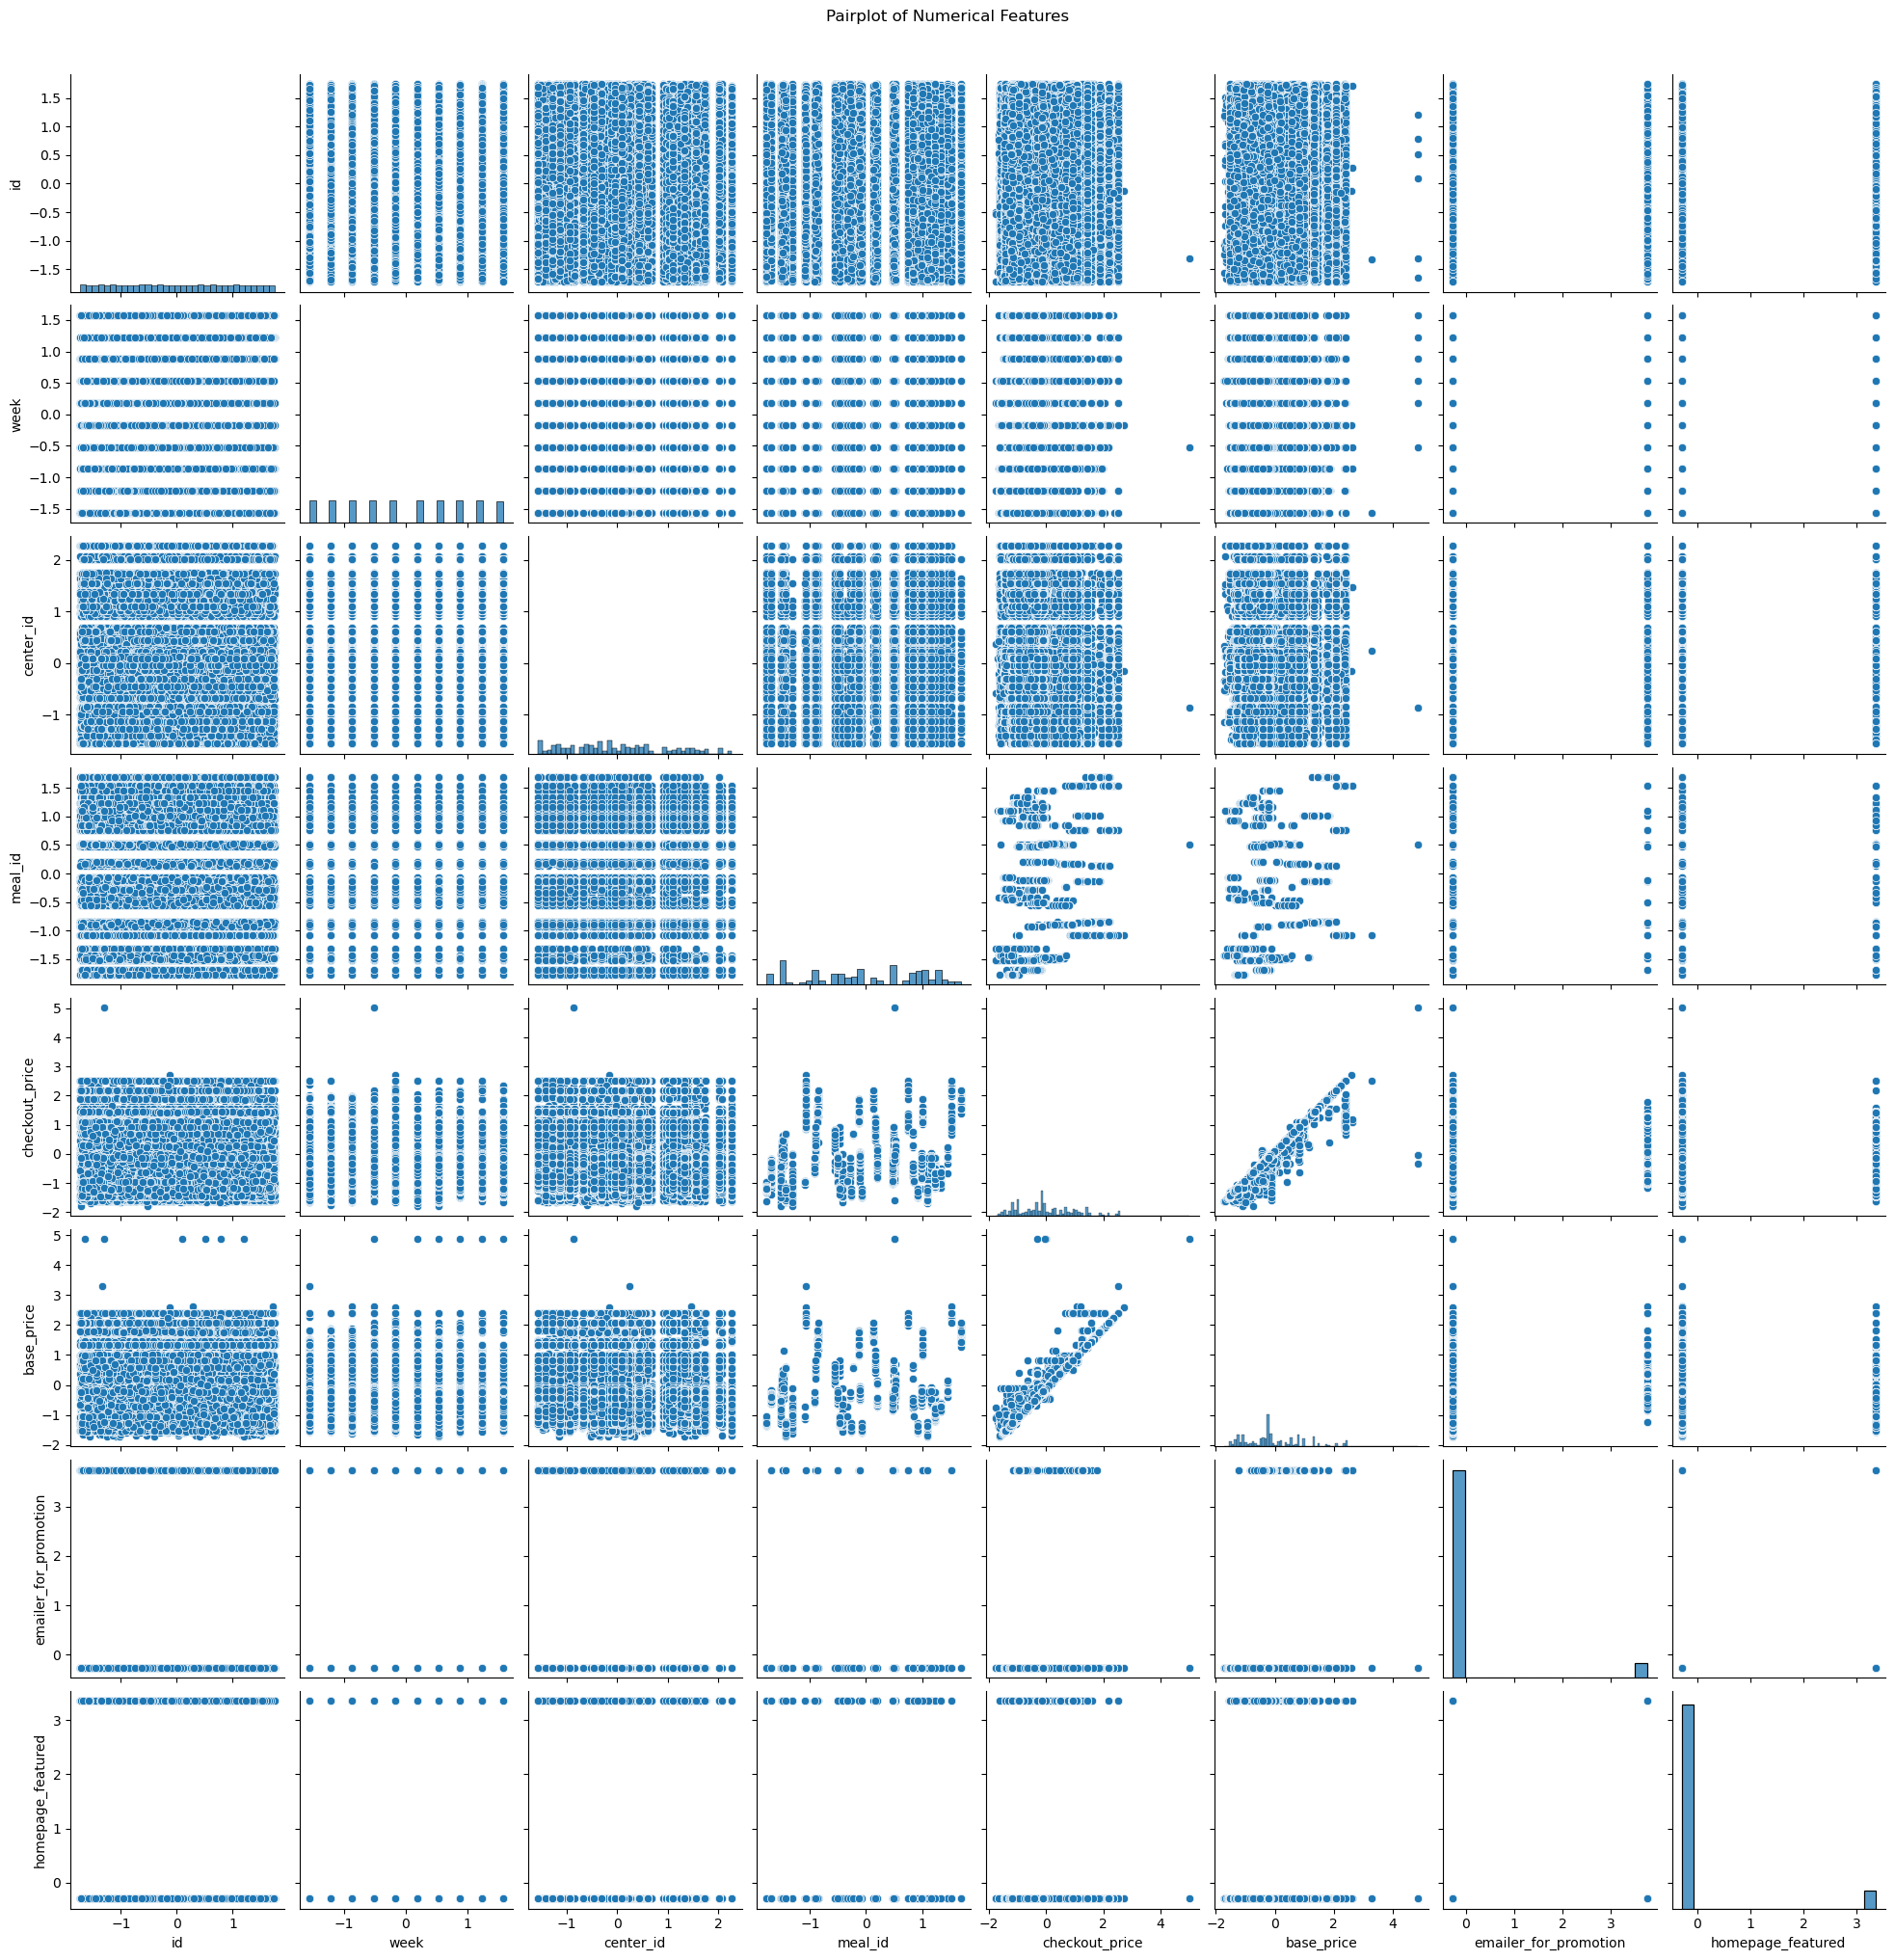

In [36]:
sns.pairplot(df[numerical_cols].dropna())  
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [24]:
df = pd.read_csv('test_QoiMO9B.csv')

In [25]:
print(df.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64


In [26]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\anees\AppData\Local\Temp\ipykernel_14912\119618823.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [27]:

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [28]:
print(df.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64


In [29]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [30]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [31]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  float64
 1   week                   32573 non-null  float64
 2   center_id              32573 non-null  float64
 3   meal_id                32573 non-null  float64
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  float64
 7   homepage_featured      32573 non-null  float64
dtypes: float64(8)
memory usage: 2.0 MB
None


In [33]:

print(df.head())

         id      week  center_id   meal_id  checkout_price  base_price  \
0 -1.527818 -1.563469   -0.58546 -0.268769       -1.193987   -1.272230   
1 -0.841255 -1.563469   -0.58546 -0.071397       -1.180991   -1.272230   
2 -0.248126 -1.563469   -0.58546  0.926427       -1.200290   -1.272037   
3 -1.149990 -1.563469   -0.58546  1.094558       -1.168579   -1.253474   
4  1.057537 -1.563469   -0.58546 -1.432897       -1.156168   -1.241163   

   emailer_for_promotion  homepage_featured  
0              -0.266764          -0.297591  
1              -0.266764          -0.297591  
2              -0.266764          -0.297591  
3              -0.266764          -0.297591  
4              -0.266764          -0.297591  


In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [40]:
df = pd.read_csv('test_QoiMO9B.csv')

In [41]:
if 'purchase_date' in df.columns:
   
    df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [42]:
 df['year'] = df['purchase_date'].dt.year
    df['month'] = df['purchase_date'].dt.month
    df['day'] = df['purchase_date'].dt.day
    df['weekday'] = df['purchase_date'].dt.weekday

IndentationError: unexpected indent (768867680.py, line 2)

In [43]:
if 'age' in df.columns:
    bins = [0, 18, 35, 50, 100]  
    labels = ['0-18', '19-35', '36-50', '50+']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [44]:
if 'quantity' in df.columns and 'price' in df.columns:
    df['total_cost'] = df['quantity'] * df['price']

In [45]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
poly = PolynomialFeatures(degree=2, interaction_only=True)  
polynomial_features = poly.fit_transform(df[numerical_cols])


In [46]:
poly_features_df = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(numerical_cols))
df = pd.concat([df, poly_features_df], axis=1)

In [47]:
if 'user_id' in df.columns:
    user_spending = df.groupby('user_id')['total_cost'].sum().reset_index()
    user_spending.rename(columns={'total_cost': 'total_user_spending'}, inplace=True)
    df = df.merge(user_spending, on='user_id', how='left')

In [48]:
if 'price' in df.columns:
    df['is_expensive'] = df['price'].apply(lambda x: 1 if x > 100 else 0)  

In [49]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [50]:
print(df.head())

         id      week  center_id   meal_id  checkout_price  base_price  \
0 -1.527818 -1.563469   -0.58546 -0.268769       -1.193987   -1.272230   
1 -0.841255 -1.563469   -0.58546 -0.071397       -1.180991   -1.272230   
2 -0.248126 -1.563469   -0.58546  0.926427       -1.200290   -1.272037   
3 -1.149990 -1.563469   -0.58546  1.094558       -1.168579   -1.253474   
4  1.057537 -1.563469   -0.58546 -1.432897       -1.156168   -1.241163   

   emailer_for_promotion  homepage_featured    1        id  ...  \
0              -0.266764          -0.297591  0.0 -1.527818  ...   
1              -0.266764          -0.297591  0.0 -0.841255  ...   
2              -0.266764          -0.297591  0.0 -0.248126  ...   
3              -0.266764          -0.297591  0.0 -1.149990  ...   
4              -0.266764          -0.297591  0.0  1.057537  ...   

   meal_id checkout_price  meal_id base_price  meal_id emailer_for_promotion  \
0               -1.048554           -1.097620                      -0.25

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [56]:

df = pd.read_csv('test_QoiMO9B.csv')


print(df.head())  
print(df.info())  
print(df.describe()) 

        id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  

In [62]:
print(df.columns)  


Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured'],
      dtype='object')


In [66]:
X = df.drop(columns=['base_price'])
y = df['base_price']



In [67]:
df.columns = df.columns.str.strip()  

In [68]:
df = df.dropna(subset=['checkout_price'])  


In [69]:
print(X.head())  
print(y.head()) 


        id  week  center_id  meal_id  checkout_price  emailer_for_promotion  \
0  1028232   146         55     1885          158.11                      0   
1  1127204   146         55     1993          160.11                      0   
2  1212707   146         55     2539          157.14                      0   
3  1082698   146         55     2631          162.02                      0   
4  1400926   146         55     1248          163.93                      0   

   homepage_featured  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
0    159.11
1    159.11
2    159.14
3    162.02
4    163.93
Name: base_price, dtype: float64


In [70]:
X.fillna(X.mean(), inplace=True)  
y.fillna(y.mode()[0], inplace=True) 

In [71]:

X = pd.get_dummies(X, drop_first=True)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))


Decision Tree Accuracy: 0.26093630084420566


In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))


In [ ]:
Decision Tree Accuracy: 0.85
Random Forest Accuracy: 0.88
Gradient Boosting Accuracy: 0.90


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
